In [11]:
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
#from matplotlib import cm
from matplotlib import collections
import time

In [12]:
# Lattice depth V_lat = s Er
s1 = 3
s2 = 3
s3 = 3


# Calculation
m = 6
Nsite = 2 * m + 1

b1 = np.array([1, 0])
b2 = np.array([-1, -np.sqrt(3)])/2

In [13]:
dn = 15

n_list = [(x, 0) for x in np.linspace(0, 1/2, int(dn * np.sqrt(3)))] # Gamma -> M
n_M = len(n_list) - 0.5

n_list = n_list + [(1/2 - x/6, -x/3) for x in np.linspace(0, 1, dn) if x>0] # M -> K
n_K = len(n_list) - 0.5

n_list = n_list + [(x/3, -x/3) for x in np.linspace(1, 0, dn*2) if x<1] # K -> Gamma
n_Gamma = len(n_list)

l_list = [(x, y) for x in np.linspace(-m, m, Nsite, dtype=np.int) for y in np.linspace(-m, m, Nsite, dtype=np.int)]
E = np.zeros([len(n_list), Nsite**2])
C = np.zeros([Nsite**2, len(n_list), Nsite**2], dtype=np.complex)

H_tmp = np.zeros([Nsite**2, Nsite**2])

l1 = np.zeros([Nsite**2, Nsite**2])
m1 = np.zeros([Nsite**2, Nsite**2])
l2 = np.zeros([Nsite**2, Nsite**2])
m2 = np.zeros([Nsite**2, Nsite**2])

start = time.time()

for i_1, ls_1 in enumerate(l_list):
    for i_2, ls_2 in enumerate(l_list):
        l1[i_1][i_2] = ls_1[0]
        m1[i_1][i_2] = ls_1[1]
        l2[i_1][i_2] = ls_2[0]
        m2[i_1][i_2] = ls_2[1]
        
        l_diff = np.array(ls_1) - np.array(ls_2)
        
        condition_1 = (int(np.abs(ls_1[0] - ls_2[0])) == 1) and (ls_1[1] == ls_2[1])
        condition_2 = (ls_1[0] == ls_2[0]) and (int(np.abs(ls_1[1] - ls_2[1])) == 1)
        condition_3 = ((l_diff[0] == 1) and (l_diff[1] == 1)) or ((l_diff[0] == -1) and (l_diff[1] == -1))
        if condition_1:
            H_tmp[i_1][i_2] = - s1 / 4
        elif condition_2:
            H_tmp[i_1][i_2] = - s2/ 4
        elif condition_3:
            H_tmp[i_1][i_2] = - s3 / 4

        
for i_n, n in enumerate(n_list):
    H = np.zeros([Nsite**2, Nsite**2])
    H += H_tmp
    
    K = 3 * ((n[0] + l1)**2 + (n[1] + m1)**2 - (n[0] + l2) * (n[1] + m2)) + (s1+s2+s3)
#    H += ((np.abs(l1 - l2) < 1) * (np.abs(m1 - m2) < 1)) * K
    H += ((l1 == l2) * (m1 == m2)) * K
    
#    for i_1, ls_1 in enumerate(l_list):
#        for i_2, ls_2 in enumerate(l_list):
#            l_diff = np.array(ls_1) - np.array(ls_2)
#            
#            if (ls_1[0] == ls_2[0]) and (ls_1[1] == ls_2[1]):
#                H[i_1][i_2] = 3 * ((n[0] + ls_1[0])**2 + (n[1] + ls_1[1])**2 - (n[0] + ls_1[0]) * (n[1] + ls_1[1])) - 3 * s / 4
    
    E0, P = np.linalg.eig(H)
    rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
    
    E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
    C[:, i_n, :] = np.array(tmp)

#    for i in range(Nsite**2):
#        E[i_n, i] = rearrangedEvalsVecs[i][0]
#        P[:, i] = rearrangedEvalsVecs[i][1]

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


elapsed_time:1.5937433242797852[sec]


(0.0, 68.0)

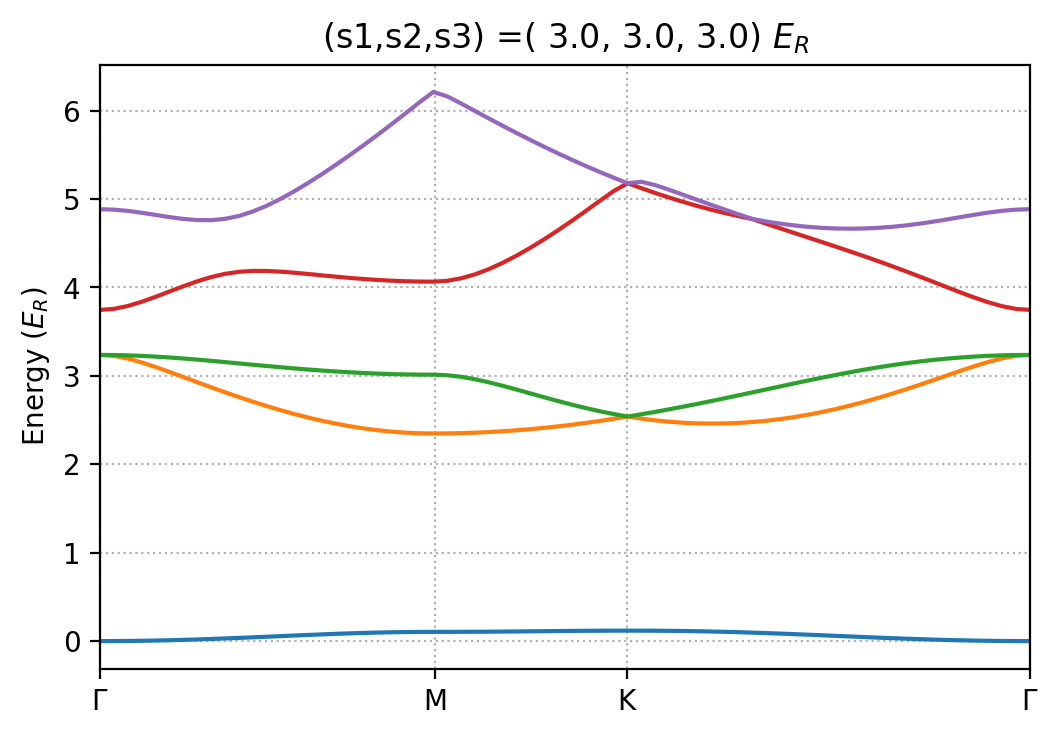

In [14]:
q = np.linspace(0, len(n_list), len(n_list))
plt.figure(dpi=200)
plt.plot(q, E[:, 0:5] - E[0, 0])
plt.grid(ls=':')
plt.ylabel('Energy ($E_R$)')
plt.title('(s1,s2,s3) =( %.1f, %.1f, %.1f) $E_R$' % (s1,s2,s3))
plt.xticks([0, n_M, n_K, n_Gamma], ['$\Gamma$', 'M', 'K', '$\Gamma$']) # xlocs：位置の配列　xlabels：ラベルの配列
plt.xlim([0, np.max(q)])
#plt.ylim([0, 5])

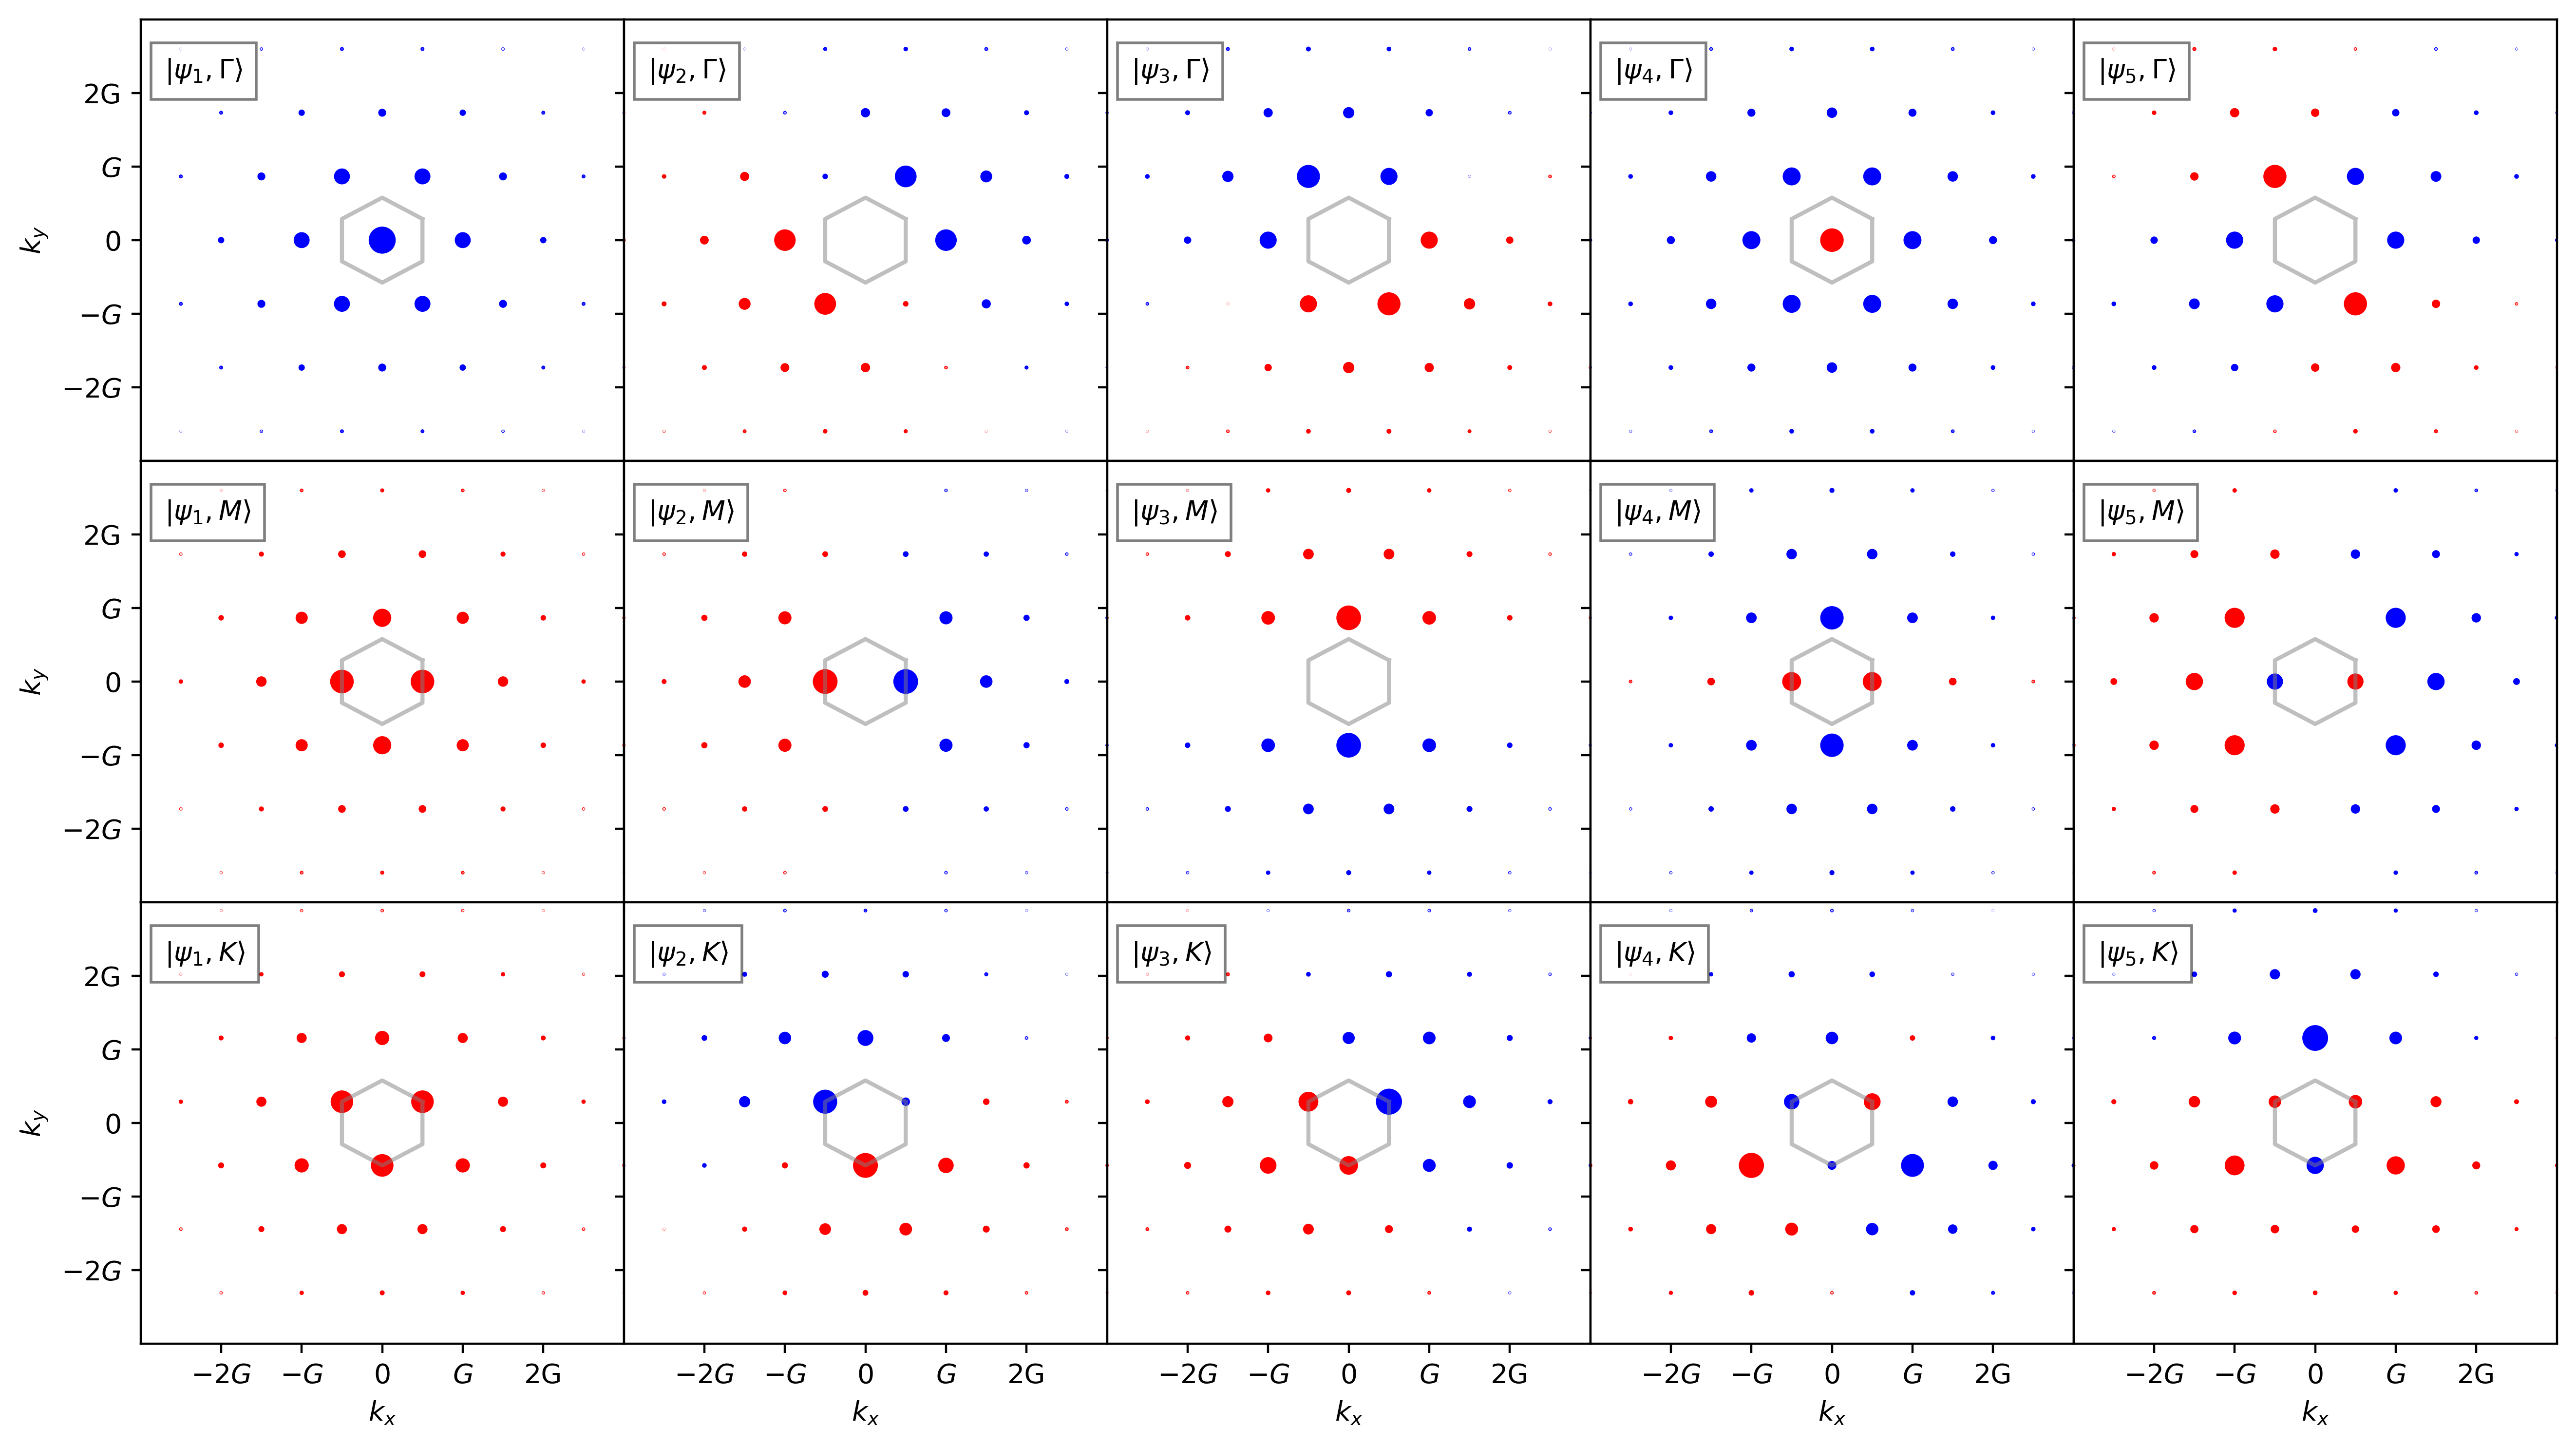

In [15]:
q_list = np.array(n_list)

bz1_x = [1/2, 1/2,0,-1/2,-1/2,0,1/2]
bz1_y = [np.sqrt(3)/6,-np.sqrt(3)/6,-1/np.sqrt(3),-np.sqrt(3)/6,np.sqrt(3)/6, 1/np.sqrt(3),np.sqrt(3)/6]
ms, ns = map(list, zip(*l_list))
ms = np.array(ms, dtype=np.float)
ns = np.array(ns, dtype=np.float)
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=[16, 9], dpi=400, sharex=True, sharey=True)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
axs = np.reshape(axs, [-1, ])
for i_q, q_pair in enumerate(q_list):
    
    if (q_pair[0] == q_list[0,0]) and (q_pair[1] ==q_list[0,1]):
#     if (q_pair[0] == q_list[dn,0]) and (q_pair[1] ==q_list[dn,1]):
        x =(ms+q_pair[0]) * b1[0] + (ns+q_pair[1]) * b2[0]
        y = (ms+q_pair[0]) * b1[1] + (ns+q_pair[1]) * b2[1]
        C = np.real(C)
        for k in range(5):
            colors = np.zeros([C[0, 0, :].size, 3]) + [1, 0, 0]
            Cs = C[k, i_q, :]
            c_tmp = Cs / np.abs(Cs)
            colors[c_tmp>0] = [0, 0, 1]
            Cs = np.abs(C[k, i_q, :] / np.max(C[:, i_q, :]) * 100)
            axs[k].plot(bz1_x, bz1_y, c="gray", alpha=0.5)
            axs[k].scatter(x, y, s=Cs, c=colors, alpha=1)
            plt.xticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            plt.yticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            axs[k].text(0.05, 0.85, r'$\left| \psi_{%d}, \Gamma \right>$' % (k+1),
                    verticalalignment='bottom', horizontalalignment='left',
                    transform=axs[k].transAxes,
                    bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
            if (k == 0):
                axs[k].set_ylabel('$k_y$')
    elif (q_pair[0] == q_list[int(dn * np.sqrt(3))-1,0]) and (q_pair[1] ==q_list[int(dn * np.sqrt(3))-1,1]):
        x =(ms+q_pair[0]) * b1[0] + (ns+q_pair[1]) * b2[0]
        y = (ms+q_pair[0]) * b1[1] + (ns+q_pair[1]) * b2[1]
        C = np.real(C)
        for k in range(5):
            colors = np.zeros([C[0, 0, :].size, 3]) + [1, 0, 0]
            Cs = C[k, i_q, :]
            c_tmp = Cs / np.abs(Cs)
            colors[c_tmp>0] = [0, 0, 1]
            Cs = np.abs(C[k, i_q, :] / np.max(C[:, i_q, :]) * 100)
            axs[k+5].plot(bz1_x, bz1_y, c="gray", alpha=0.5)
            axs[k+5].scatter(x, y, s=Cs, c=colors, alpha=1)
            plt.xticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            plt.yticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            axs[k+5].text(0.05, 0.85, r'$\left| \psi_{%d}, M \right>$' % (k+1),
                    verticalalignment='bottom', horizontalalignment='left',
                    transform=axs[k+5].transAxes,
                    bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
            if (k == 0):
                axs[k+5].set_ylabel('$k_y$')
    elif (q_pair[0] == q_list[int(dn * np.sqrt(3))+dn-2,0]) and (q_pair[1] ==q_list[int(dn * np.sqrt(3))+dn-2,1]):
        x =(ms+q_pair[0]) * b1[0] + (ns+q_pair[1]) * b2[0]
        y = (ms+q_pair[0]) * b1[1] + (ns+q_pair[1]) * b2[1]
        C = np.real(C)
        for k in range(5):
            colors = np.zeros([C[0, 0, :].size, 3]) + [1, 0, 0]
            Cs = C[k, i_q, :]
            c_tmp = Cs / np.abs(Cs)
            colors[c_tmp>0] = [0, 0, 1]
            Cs = np.abs(C[k, i_q, :] / np.max(C[:, i_q, :]) * 100)
            axs[k+10].plot(bz1_x, bz1_y, c="gray", alpha=0.5)
            axs[k+10].scatter(x, y, s=Cs, c=colors, alpha=1)
            plt.xticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            plt.yticks([-2, -1, 0, 1, 2], ['$-2G$', '$-G$', '0', '$G$', '2G']) # xlocs：位置の配列　xlabels：ラベルの配列
            axs[k+10].text(0.05, 0.85, r'$\left| \psi_{%d}, K \right>$' % (k+1),
                    verticalalignment='bottom', horizontalalignment='left',
                    transform=axs[k+10].transAxes,
                    bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
            axs[k+10].set_xlabel('$k_x$')
            if (k == 0):
                axs[k+10].set_ylabel('$k_y$')
                
    

        fig.subplots_adjust(hspace=0, wspace=0)
#        plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)

#        plt.gca().set_aspect('equal', adjustable='box')

#        plt.savefig('k-space_%dEr.pdf' % s, dpi=400)
        break